# 3. Experimental results

### 3.1 Introduction

In our challenging journey of setting up our agent for the ring against other agents we always had to try different combinations of the functions we created. These are the reinforcement learning method, normalizing the state, the different features and the game settings, such how many coins, crates and steps there are in each game.
While playing around with all the different functions we created we wanned a way to mesure how good our agent was learnig. To save some saples that indicated how our agent was learning we created a folder named "Histories" that contained a .pt file with the different stats of the game. Such as the number of coins collected, the number of invalid moves etc... 
This helped us keep track of what settings led us to which results.
The next step was to write code to help us monitor these results in a clear and structured way. This file is called monitoring.py.
To help explain our thought process I will divide the section of experimental result in 3 different parts in which I will also explain what interesting observations we made and what changes we :
Coin collector (collect coins in an open field)
Crate agent (set bombs to collect coins)
Simulation study: n-step Sarsa vs trace-decay

## 3.2 Coin collecting agent 

### 3.2.1 Exploting symmetries

The first mission of our agent was to collect coins in an open field without any crates. For this mission we started exploiting the symmetries and had as features: the coin map with look around, the wall map with look around and the coins in quartal; while using an epsilon-greedy policy. 
We set the end of a game at 3000 steps and multiplied x3 the number of coins that spawned in a game. To multiply the coins we wrote a function. '''After implementing this function we observed that it was possible for the game to spawned more than a coin at the same position, so we decided to change that.'''
#explain what the functions do if it has not been done before
In our first monitoring we wanned to be sure that training while exploiting two spatial symmetries led to a quicker learning process then not exploiting any.

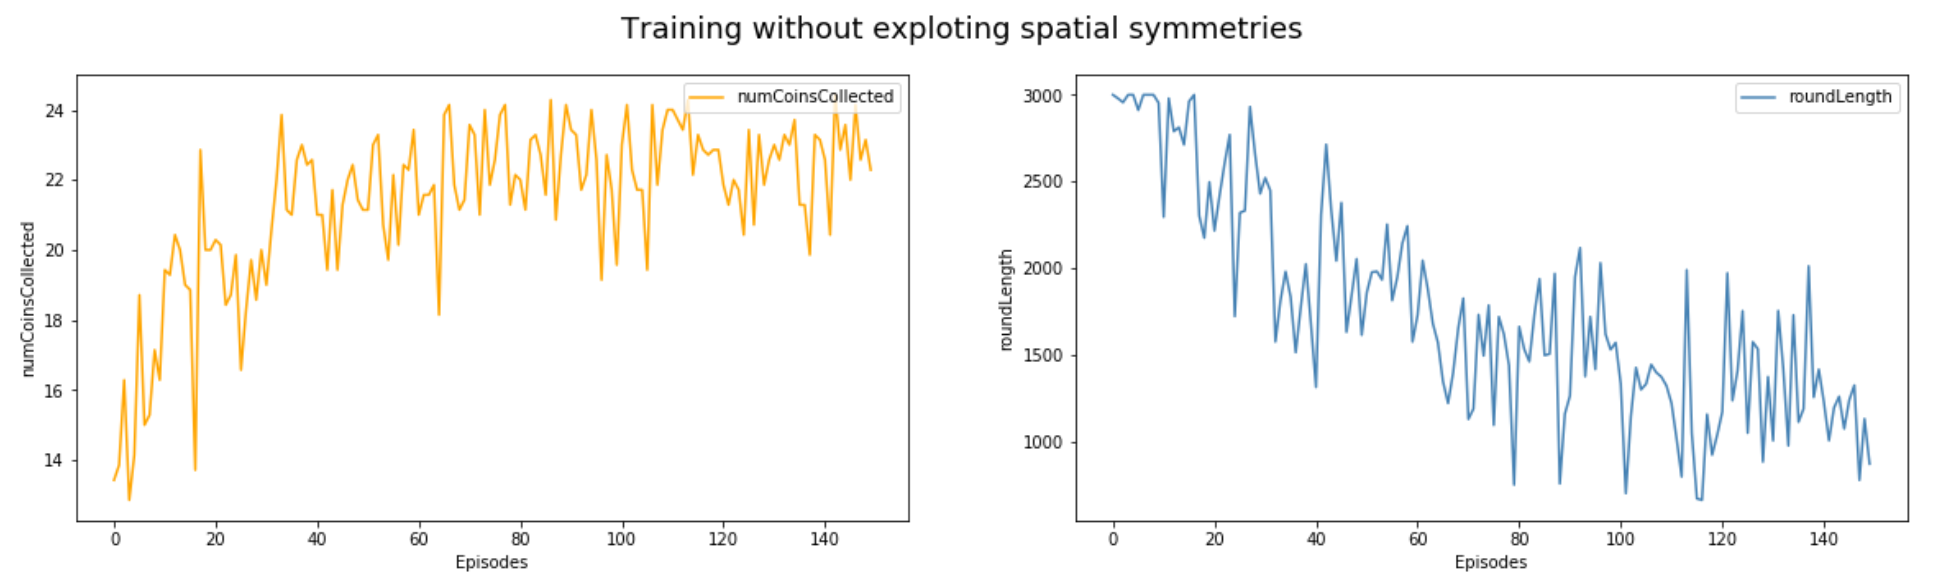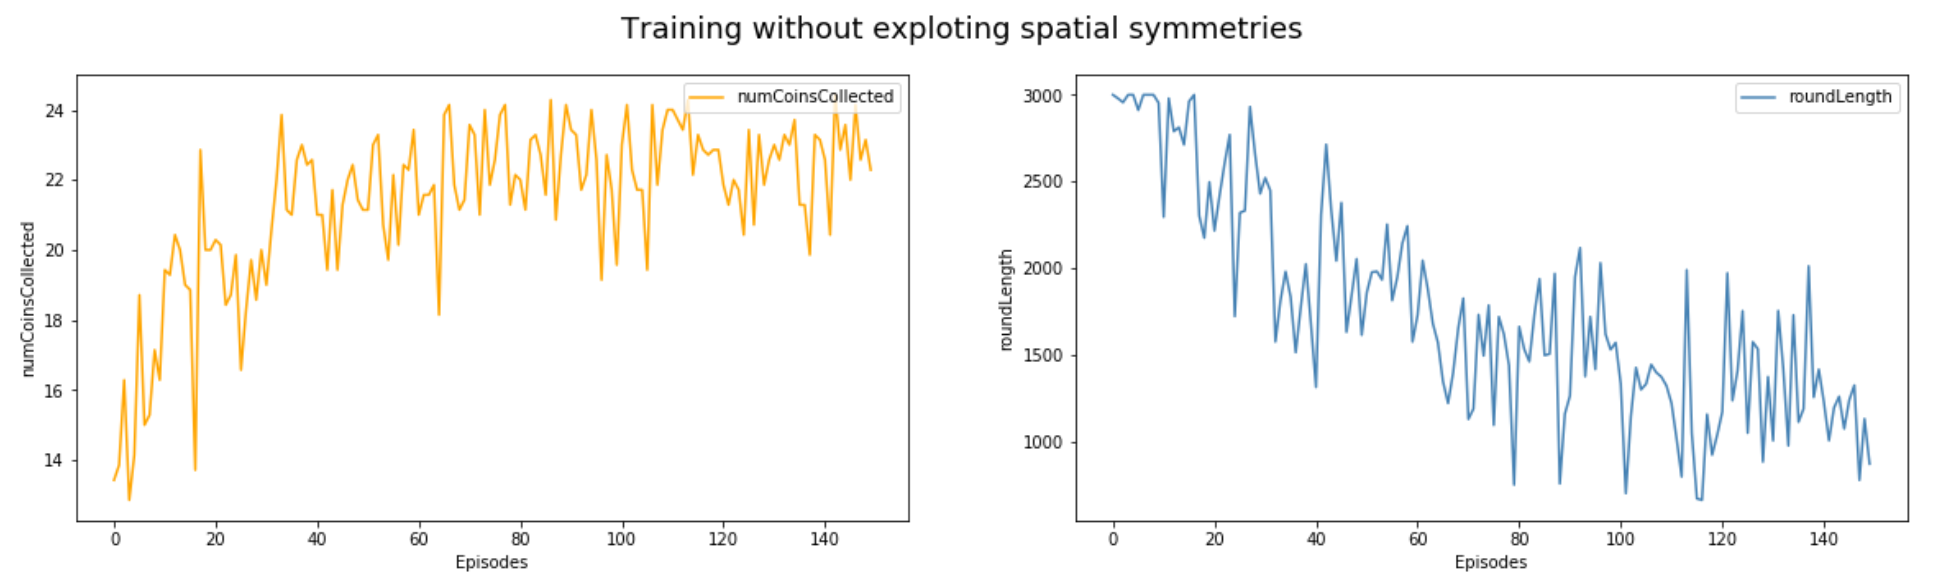


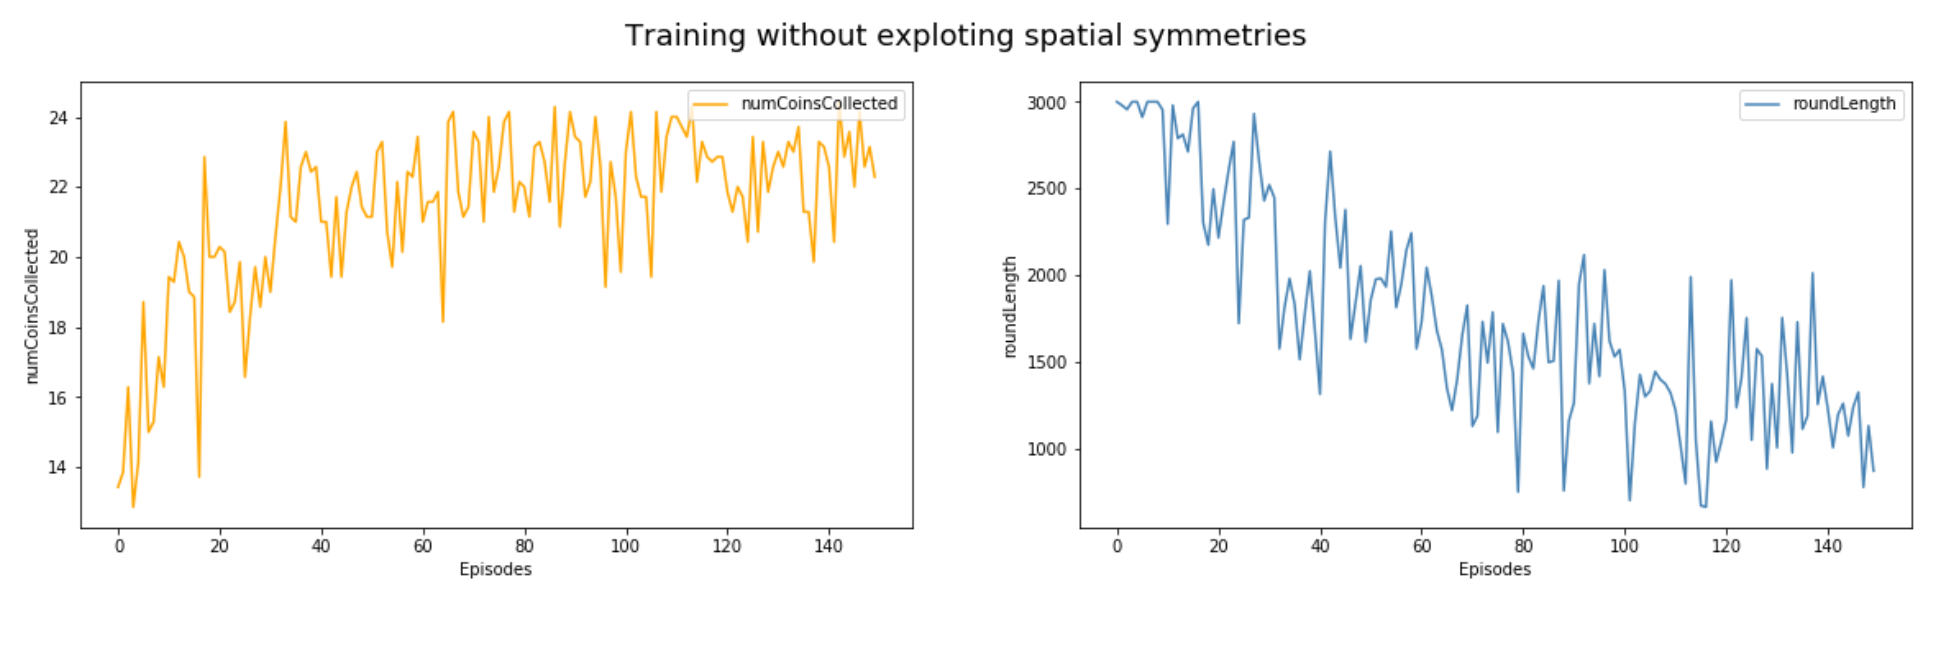

As we could observe a better learnig curve we decided to exploit the third spetial symmetry. The diagonal spetial symmetry. 

 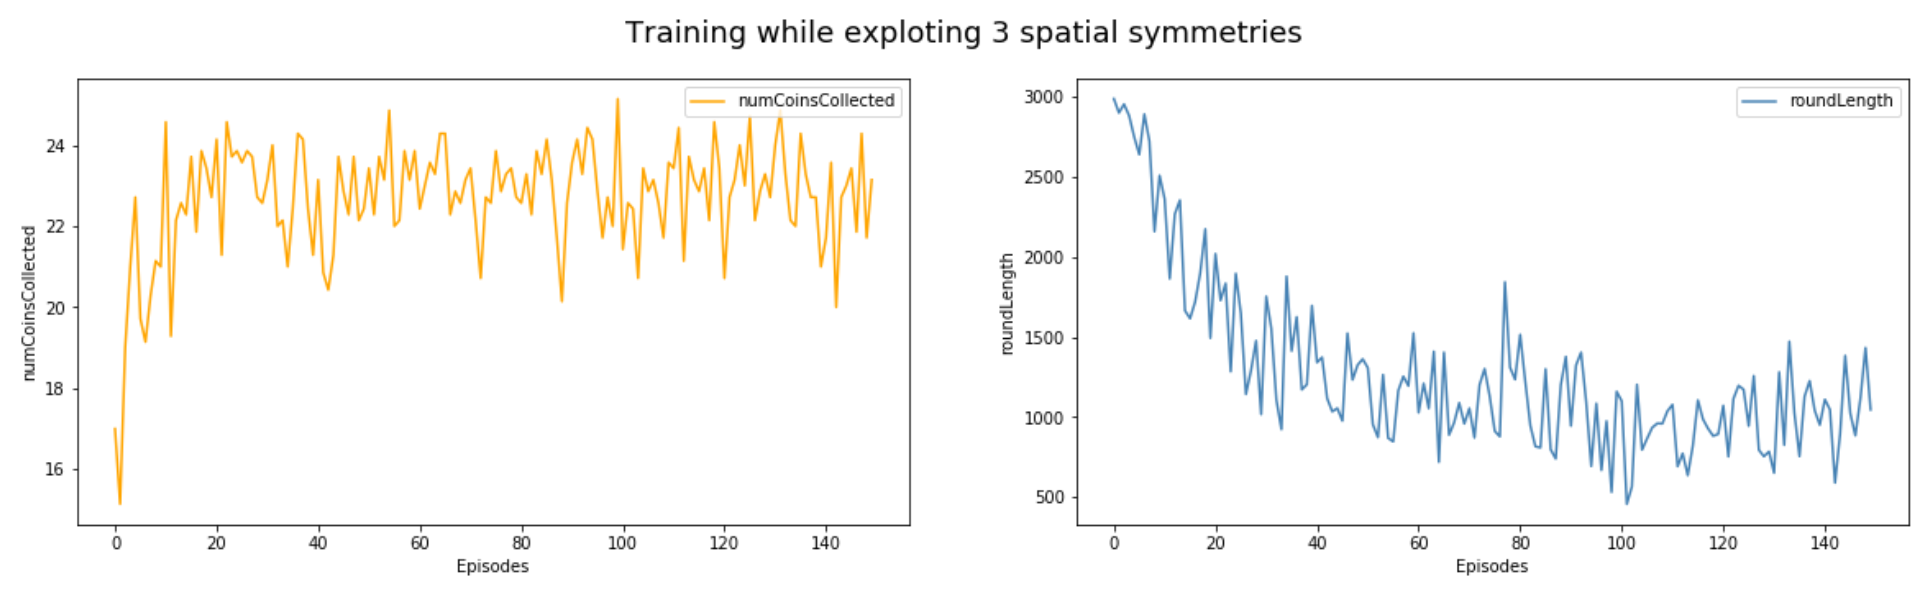
 
 

### 3.2.2 The quartal feature problem

As of this point we started noticing a big problem: 
Mostly when in playing mode our agent started to get stuck and repeat the same two moves after each step, going up and down or left and right for the rest of the game. This is because in playing mode we set a low epsilon so that he would do less random moves and just select the "good ones" with the idea that while playing he did not need to explore. We discovered that the agent got stuck because when there were only a few coins left he could not decide to which quartal he should go.
The only way he could get out of repeating these moves over and over was after by performing a random action and get out of this state. Since in training mode there was a higher chance of doing a random move (bigger epsilon) he did not get stuck as often as in training mode. 
We tried to fix this bug by rewriting the coins in quartal feature but the problem persisted. So we decided to use a higher epsilon also when in playing mode. This helped to get out of this bug-state quicker, but we still had one problem, we needed a lot of moves to collect all the coins. 
We came upwith two different solutions for this problem:
1)Implementing a softmax policy. A softmax will also help us in our next task, since when our agent sets a bomb he cannot allow himself to do at random all actions with the same probability.
2)Implementing a feature that describes where the next nearest coin is.

### 3.2.3 Shortest path feature

After implementing the shortes path feature we managed to fix the bug and got really good results as we can see in the next graph.

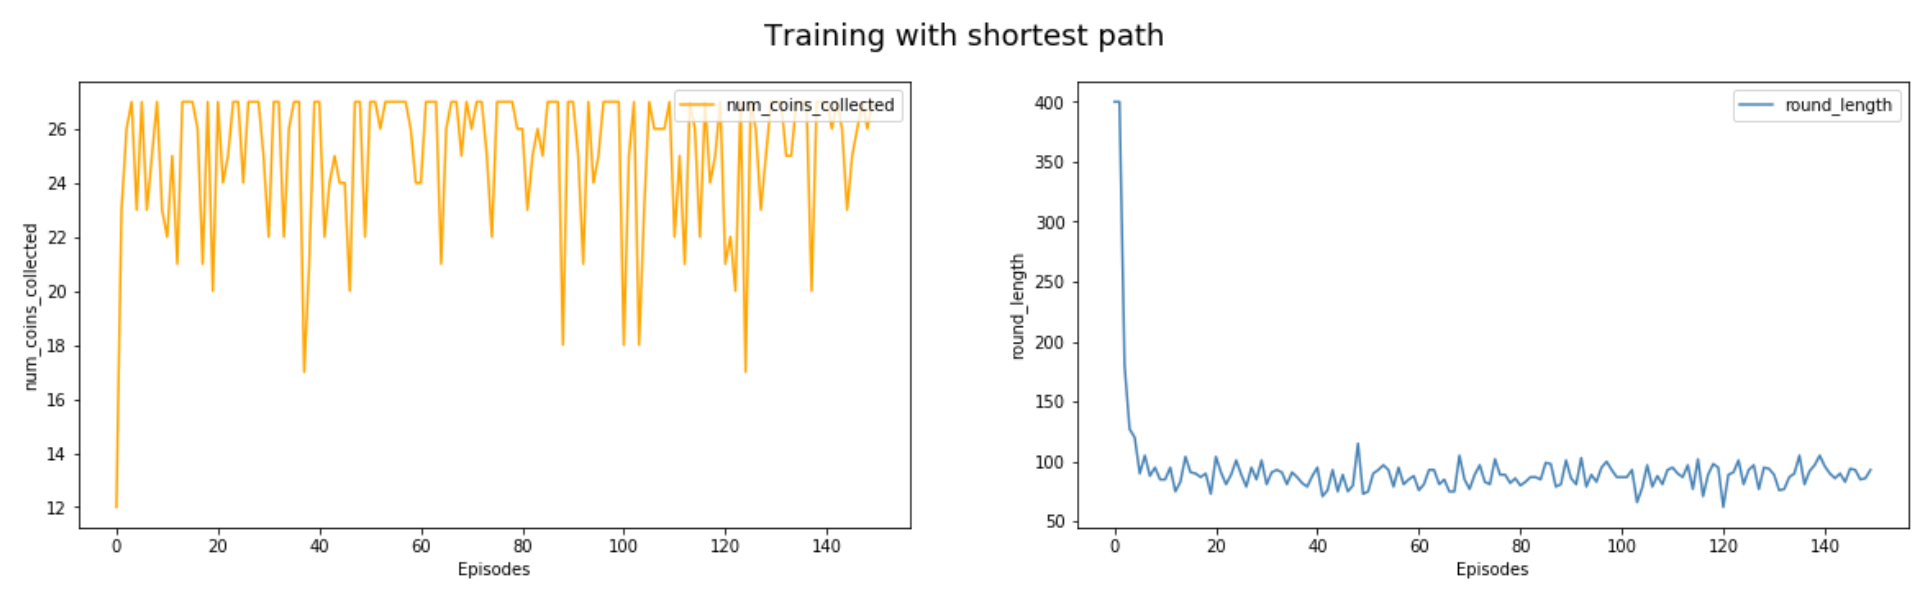

## 3.3 Crate Agent

### 3.3.1 Setup

In this section the task of our agent was to destroy crates in order to collect the coins around the map. Therefore we needed to implement new features and had to change our monitoring in order to see how many bombs were dropped, how many crates were destroyed and other helpful things that we started implementing along the way.
A big challenge was to keep track of all the trainings with all the different game, methods and feature settings. Since we tried to train with as much combinations as possible. 
To help us train as much combinations as possible we wrote a shell script (train.sh) so that with one execution of the code we could train multiple agents for certain number of episodes.
Afterwards we also wrote a simulation_study.py to make our agent train during the night with different combinations.

### 3.3.2 

In the 

## 3.4 Simulation study: n-step Sarsa vs trace-decay

### 3.4.1 

Thanks to our simulation study function we were able to make a comparison between n-step Sarsa and trace-decay for our linear agent. The parameters and the methods that we wanned to compare:
1) The n for the n-step-Sarsa method 
2) The lambda for the Sarsa(lambda) method 
3) The learning rate (alpha)
4) The two methods with the different setiings